## Ranking PGH Neighborhoods by Public Infrastructure Using Wifi Hotspot Data

- Importing TA's snippets and pandas

In [15]:
import pandas as pd
import fpsnippets

- importing wifi data from file, dropping tons of rows with irrelevant data

In [16]:
data = pd.read_csv("wifi_locations.csv")
wifi_df = pd.DataFrame(data)

drop_columns = ['_id','object_id','ssid','global_id','location_name','location_details','location_hours','password_required','password_details','account_required','account_details','street1','street2','state','web_site','amenities_restroom','amenities_seating','amenities_vending','amenities_details','public_notes','location_type','id',]
wifi_df = wifi_df.drop(columns=drop_columns)

- Using TA's code to get neighborhood info, finding which neighborhoods have the highest number of wifi hotspots

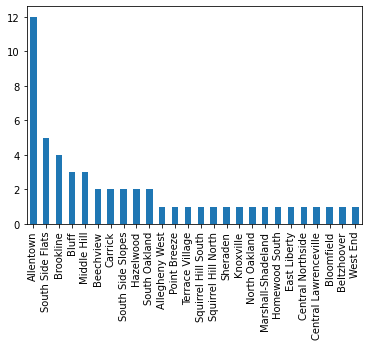

In [17]:
wifi_df['neighborhood'] = wifi_df.apply(lambda row: fpsnippets.geo_to_neighborhood(row['y'], row['x']), axis=1)

wifi_df = wifi_df.sort_values(by=["neighborhood"], ascending=True)
wifi_counts = wifi_df['neighborhood'].value_counts()

wifi_counts.plot(kind='bar')